<a href="https://colab.research.google.com/github/countingtls/PA_HRV_Sleep/blob/main/swell_test_14_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import sklearn.pipeline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

In [ ]:
#import hrvanalysis as hrva

In [ ]:
#with open("/content/hrv-analysis/tests/test_nn_intervals.txt", "r") as text_file:
#  lines = text_file.readlines()
#nn_intervals = list(map(lambda x: int(x.strip()), lines))
#print(nn_intervals)

In [ ]:
#rr_intervals_list = [100, 110, 100, 130, 100, 100, 70, 100, 120, 100]
#rr_intervals_without_outliers = hrva.remove_outliers(rr_intervals=rr_intervals_list,  
#                                                low_rri=300, high_rri=2000)
#interpolated_rr_intervals = hrva.interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, 
#                                                   interpolation_method="linear")
#nn_intervals_list = hrva.remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
#interpolated_nn_intervals = hrva.interpolate_nan_values(rr_intervals=nn_intervals_list)
#print(interpolated_nn_intervals)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.2 MB/s 
     |████████████████████████████████| 106 kB 40.0 MB/s 
     |████████████████████████████████| 230 kB 16.2 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.1-cp37-cp37m-linux_x86_64.whl size=235158 sha256=3bebb77c6f2e7672e736cee89f5c0f63d7db760f0a85d02d8e0e4ddfdd57774d
  Stored in directory: /root/.cache/pip/wheels/79/db/9c/92fa684ca088447807d08672e7609b48102c6161ac9c7e3c62
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=61fad19818bbcefe8fbdf263fa14b489388f66033327f5626d90cd858d8d1f1d
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built spectrum easydev


In [ ]:
!pip install hrv_analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read in the dataset

df_test = pd.read_csv("/content/drive/MyDrive/SWELL/hrv dataset/data/final/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/SWELL/hrv dataset/data/final/train.csv")
print(f"df_train shape{df_train.shape}")
print(f"df_test shape{df_test.shape}")

df_train shape(369289, 36)
df_test shape(41033, 36)


In [ ]:
df_PA_all = pd.read_csv("/content/drive/MyDrive/SWELL/hrv PA/PA_all_p.csv")
print(f"df_PA_all shape{df_PA_all.shape}")

df_PA_all shape(37026, 18)


In [ ]:
#Read the sleep quality dataset

df_sleep = pd.read_csv("/content/drive/MyDrive/SWELL/hrv sleep/total_daily_HRV.csv")
print(f"df_sleep shape{df_sleep.shape}")

df_sleep shape(55, 17)


In [ ]:
#Read the 02A7005A dataset

HRV_02A7005A = pd.read_csv("/content/drive/MyDrive/SWELL/hrv sleep/3 persons/02A7005A_total.csv")
print(f"HRV_02A7005A shape{HRV_02A7005A.shape}")

HRV_02A7005A shape(6019, 17)


In [ ]:
#Read the 029E005A dataset

HRV_029E005A = pd.read_csv("/content/drive/MyDrive/SWELL/hrv sleep/3 persons/029E005A_total.csv")
print(f"HRV_029E005A shape{HRV_029E005A.shape}")

HRV_029E005A shape(6277, 17)


In [ ]:
#Read the 0275005A dataset

HRV_0275005A = pd.read_csv("/content/drive/MyDrive/SWELL/hrv sleep/3 persons/0275005A_total.csv")
print(f"HRV_0275005A shape{HRV_0275005A.shape}")

HRV_0275005A shape(2344, 17)


In [ ]:
p1_raw = pd.read_csv("/content/drive/MyDrive/SWELL/hrv dataset/data/raw/rri/p1.txt", sep=None, engine='python', 
header=None, quoting=0, skipinitialspace=True)
print(f"p1_raw{p1_raw.shape}")

p1_raw(35974, 2)


In [ ]:
display(p1_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35974 entries, 0 to 35973
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35974 non-null  float64
 1   1       35974 non-null  float64
dtypes: float64(2)
memory usage: 562.2 KB


None

In [ ]:
hrv_window_in_min = 5
hrv_window_in_sec = hrv_window_in_min * 60
sampling_rate_hz = 4
hrv_window_samples = hrv_window_in_sec * sampling_rate_hz
m = hrv_window_samples 
t1=p1_raw.iloc[0:m-1,1].values

In [ ]:
from hrvanalysis import *
rr_intervals_without_outliers = remove_outliers(rr_intervals=t1, low_rri=300, high_rri=2000)
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                   interpolation_method="linear")
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
t1_nni = interpolated_nn_intervals

0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.


In [ ]:
t1_time_domain_features = get_time_domain_features(t1_nni)
t1_frequency_domain_features = get_frequency_domain_features(t1_nni)
t1_geometrical_features = get_geometrical_features(t1_nni)
t1_poincare_plot_features = get_poincare_plot_features(t1_nni)
t1_csi_cvi_featuress = get_csi_cvi_features(t1_nni)
t1_sampen = get_sampen(t1_nni)
print(t1_time_domain_features)
print(t1_frequency_domain_features)
print(t1_geometrical_features)
print(t1_poincare_plot_features)
print(t1_csi_cvi_featuress)
print(t1_sampen)

{'mean_nni': 932.1795375479568, 'sdnn': 131.44268945640002, 'sdsd': 13.61806603470211, 'nni_50': 4, 'pnni_50': 0.333889816360601, 'nni_20': 155, 'pnni_20': 12.93823038397329, 'rmssd': 13.618171445401018, 'median_nni': 966.36998, 'range_nni': 657.66723, 'cvsd': 0.014608957713470962, 'cvnni': 0.14100576569418402, 'mean_hr': 65.99109917173085, 'max_hr': 113.2847796026676, 'min_hr': 50.53457579887373, 'std_hr': 11.767116979417475}
{'lf': 1203.1308721280757, 'hf': 5.006709739241741, 'lf_hf_ratio': 240.30369939326425, 'lfnu': 99.58558447196855, 'hfnu': 0.4144155280314421, 'total_power': 3768.7890349625077, 'vlf': 2560.6514530951904}
{'triangular_index': 23.50980392156863, 'tinn': None}
{'sd1': 9.633448317027561, 'sd2': 185.63824470347265, 'ratio_sd2_sd1': 19.27017601530581}
{'csi': 19.27017601530581, 'cvi': 4.456569207719794, 'Modified_csi': 14309.126602433318}
{'sampen': 0.355685151443028}


In [ ]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [ ]:
df_PA_all.head()

,MEAN_RR,SDRR,HR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,PA,ID,categories,device_time
0,580.0,25.0,103.448276,0.0,0.000000,173.0,80.092593,90.104167,19.0,8.796296,9.895833,216.0,9.105263,0.109827,on patch,1,-1,2016-01-07 08:27:41
1,611.0,43.0,98.199673,1286.0,56.852343,913.0,40.362511,95.802728,40.0,1.768347,4.197272,2262.0,22.825000,0.043812,breakfast,1,-1,2016-01-07 08:28:00
2,633.0,54.0,94.786730,674.0,29.665493,1410.0,62.059859,90.967742,140.0,6.161972,9.032258,2272.0,10.071429,0.099291,breakfast,1,-1,2016-01-07 08:28:38
3,649.0,49.0,92.449923,1142.0,70.147420,379.0,23.280098,88.139535,51.0,3.132678,11.860465,1628.0,7.431373,0.134565,breakfast,1,-1,2016-01-07 08:29:53
4,635.0,54.0,94.488189,1337.0,61.955514,605.0,28.035218,81.208054,140.0,6.487488,18.791946,2158.0,4.321429,0.231405,breakfast,1,-1,2016-01-07 08:32:23


In [ ]:
df_sleep.head()

,MEAN_RR,SDNN,HR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,Sleep Quality,PatchID,date
0,785.775623,87.717452,76.357675,2813.592798,39.701256,1902.991690,26.852201,60.335341,1251.033241,17.652729,39.664659,7086.911357,1.521136,0.657403,4,01F5005A,2016/11/8
1,755.632458,69.821002,79.403683,2682.825776,50.419352,1121.892601,21.084149,65.194471,598.947494,11.256245,34.805529,5321.023866,1.873107,0.533872,4,01F5005A,2016/11/9
2,777.838565,70.807175,77.136829,2137.062780,41.707277,1095.028401,21.370758,56.058273,858.346786,16.751640,43.941727,5123.956652,1.275741,0.783858,4,01F5005A,2016/11/10
3,789.225064,68.534527,76.023941,2710.565217,53.790746,1045.636829,20.750501,59.763515,703.987212,13.970517,40.236485,5039.092072,1.485307,0.673262,4,01F5005A,2016/11/11
4,785.866290,66.472693,76.348866,2131.900188,47.167486,948.190207,20.978350,59.370062,648.894539,14.356546,40.629938,4519.851224,1.461239,0.684351,4,01F5005A,2016/11/12


In [ ]:
HRV_02A7005A.head()

,MEAN_RR,SDNN,HR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,Sleep Quality,Date,Device_date
0,484.0,166.0,123.966942,9288.0,27.330508,7306.0,21.498352,0.401340,10898.0,32.068032,0.598660,33984.0,0.670398,1.491651,NaN,2016/10/27,2016/10/27 18:11
1,452.0,55.0,132.743363,1709.0,56.626905,271.0,8.979457,0.352406,498.0,16.500994,0.647594,3018.0,0.544177,1.837638,NaN,2016/10/27,2016/10/27 18:14
2,470.0,56.0,127.659574,1585.0,47.018689,422.0,12.518540,0.518428,392.0,11.628597,0.481572,3371.0,1.076531,0.928910,NaN,2016/10/27,2016/10/27 18:16
3,507.0,51.0,118.343195,526.0,37.544611,396.0,28.265525,0.639742,223.0,15.917202,0.360258,1401.0,1.775785,0.563131,NaN,2016/10/27,2016/10/27 18:19
4,504.0,43.0,119.047619,797.0,31.205951,964.0,37.744714,0.691039,431.0,16.875489,0.308961,2554.0,2.236659,0.447095,NaN,2016/10/27,2016/10/27 18:21


In [ ]:
HRV_029E005A.head()

,MEAN_RR,SDNN,HR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,Sleep Quality,Date,Device_date
0,837.0,60.0,71.684588,0.0,0.000000,196.0,7.626459,0.101397,1737.0,67.587549,0.898603,2570.0,0.112838,8.862245,NaN,2016/11/7,2016/11/7 18:24
1,825.0,47.0,72.727273,0.0,0.000000,965.0,32.198866,0.333795,1926.0,64.264264,0.666205,2997.0,0.501038,1.995855,NaN,2016/11/23,2016/11/23 13:01
2,819.0,40.0,73.260073,142.0,9.679618,658.0,44.853442,0.540674,559.0,38.104976,0.459326,1467.0,1.177102,0.849544,NaN,2016/11/23,2016/11/23 13:01
3,827.0,38.0,72.551391,36.0,3.753910,411.0,42.857143,0.493397,422.0,44.004171,0.506603,959.0,0.973934,1.026764,NaN,2016/11/23,2016/11/23 13:02
4,789.0,59.0,76.045627,989.0,54.310818,435.0,23.887974,0.588633,304.0,16.694124,0.411367,1821.0,1.430921,0.698851,NaN,2016/11/23,2016/11/23 13:03


In [ ]:
HRV_0275005A.head()

,MEAN_RR,SDNN,HR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,Sleep Quality,Date,Device_date
0,761.0,37.0,78.843627,0.0,0.000000,302.0,28.171642,0.296952,715.0,66.697761,0.703048,1072.0,0.422378,2.367550,NaN,2016/11/7,2016/11/7 15:39
1,783.0,59.0,76.628352,950.0,55.882353,396.0,23.294118,0.580645,286.0,16.823529,0.419355,1700.0,1.384615,0.722222,NaN,2016/11/7,2016/11/7 15:40
2,832.0,68.0,72.115385,3533.0,86.086745,399.0,9.722222,0.757116,128.0,3.118908,0.242884,4104.0,3.117188,0.320802,NaN,2016/11/7,2016/11/7 15:40
3,818.0,59.0,73.349633,2388.0,70.776526,266.0,7.883817,0.357527,478.0,14.167161,0.642473,3374.0,0.556485,1.796992,NaN,2016/11/7,2016/11/7 15:42
4,811.0,54.0,73.982737,1322.0,64.143620,450.0,21.834061,0.715421,179.0,8.685104,0.284579,2061.0,2.513966,0.397778,NaN,2016/11/7,2016/11/7 15:44


In [ ]:
df_train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [ ]:
df_PA_all['PA'].unique()

array(['on patch', 'breakfast', 'commuting-riding motor', nan,
       'after up 6 floors', 'work-desk', 'lunch', 'work-discussion',
       'work-meeting', 'arrive home', 'dinner', 'pre-sleep satus',
       'go to bed & light off', 'sleep', 'off patch since itch',
       'on patch at 40 min after swimming 1 hour-long', 'watch TV',
       'go to bed', 'sleep (wake to watch the clock)', 'get up',
       'off patch ', 'after swimming and showering', 'commuting-motor',
       'dining', 'commuting-MRT', 'arrive office', 'sleeping',
       '20 mins after home workout', 'chating ', 'discussion',
       'meeting in English', 'dining+discussion',
       '20 mins after swimming 1 hour', 'chatting', 'commuting',
       'lunch break', 'taking MRT', 'dining ', 'relaxing', 'GO TO BED',
       'GET UP', 'morning preparation', 'warm up for run',
       'running (HR is not correct)', '45 min after running 10 km',
       'prepare go out', 'to go upstairs', 'desk work', 'coffeex1',
       'prepare meeting

In [ ]:
#check if there is any missing value in the datasets
display(df_train.info())
display(df_test.info())
display(df_sleep.info())
display(HRV_02A7005A.info())
display(HRV_029E005A.info())
display(HRV_0275005A.info())
display(df_PA_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   HR                 41033 non-null  float64
 7   pNN25              41033 non-null  float64
 8   pNN50              41033 non-null  float64
 9   SD1                41033 non-null  float64
 10  SD2                41033 non-null  float64
 11  KURT               41033 non-null  float64
 12  SKEW               41033 non-null  float64
 13  MEAN_REL_RR        41033 non-null  float64
 14  MEDIAN_REL_RR      41033 non-null  float64
 15  SDRR_REL_RR        41033 non-null  float64
 16  RMSSD_REL_RR       410

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEAN_RR        55 non-null     float64
 1   SDNN           55 non-null     float64
 2   HR             55 non-null     float64
 3   VLF            55 non-null     float64
 4   VLF_PCT        55 non-null     float64
 5   LF             55 non-null     float64
 6   LF_PCT         55 non-null     float64
 7   LF_NU          55 non-null     float64
 8   HF             55 non-null     float64
 9   HF_PCT         55 non-null     float64
 10  HF_NU          55 non-null     float64
 11  TP             55 non-null     float64
 12  LF_HF          55 non-null     float64
 13  HF_LF          55 non-null     float64
 14  Sleep Quality  55 non-null     int64  
 15  PatchID        55 non-null     object 
 16  date           55 non-null     object 
dtypes: float64(14), int64(1), object(2)
memory usage: 7.4+ K

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEAN_RR        6019 non-null   float64
 1   SDNN           6019 non-null   float64
 2   HR             6019 non-null   float64
 3   VLF            6019 non-null   float64
 4   VLF_PCT        6019 non-null   float64
 5   LF             6019 non-null   float64
 6   LF_PCT         6019 non-null   float64
 7   LF_NU          6019 non-null   float64
 8   HF             6019 non-null   float64
 9   HF_PCT         6019 non-null   float64
 10  HF_NU          6019 non-null   float64
 11  TP             6019 non-null   float64
 12  LF_HF          6019 non-null   float64
 13  HF_LF          6019 non-null   float64
 14  Sleep Quality  0 non-null      float64
 15  Date           6019 non-null   object 
 16  Device_date    6019 non-null   object 
dtypes: float64(15), object(2)
memory usage: 799.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEAN_RR        6277 non-null   float64
 1   SDNN           6277 non-null   float64
 2   HR             6277 non-null   float64
 3   VLF            6277 non-null   float64
 4   VLF_PCT        6277 non-null   float64
 5   LF             6277 non-null   float64
 6   LF_PCT         6277 non-null   float64
 7   LF_NU          6277 non-null   float64
 8   HF             6277 non-null   float64
 9   HF_PCT         6277 non-null   float64
 10  HF_NU          6277 non-null   float64
 11  TP             6277 non-null   float64
 12  LF_HF          6277 non-null   float64
 13  HF_LF          6277 non-null   float64
 14  Sleep Quality  0 non-null      float64
 15  Date           6277 non-null   object 
 16  Device_date    6277 non-null   object 
dtypes: float64(15), object(2)
memory usage: 833.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEAN_RR        2344 non-null   float64
 1   SDNN           2344 non-null   float64
 2   HR             2344 non-null   float64
 3   VLF            2344 non-null   float64
 4   VLF_PCT        2344 non-null   float64
 5   LF             2344 non-null   float64
 6   LF_PCT         2344 non-null   float64
 7   LF_NU          2344 non-null   float64
 8   HF             2344 non-null   float64
 9   HF_PCT         2344 non-null   float64
 10  HF_NU          2344 non-null   float64
 11  TP             2344 non-null   float64
 12  LF_HF          2344 non-null   float64
 13  HF_LF          2344 non-null   float64
 14  Sleep Quality  0 non-null      float64
 15  Date           2344 non-null   object 
 16  Device_date    2344 non-null   object 
dtypes: float64(15), object(2)
memory usage: 311.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37026 entries, 0 to 37025
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_RR      37026 non-null  float64
 1   SDRR         37026 non-null  float64
 2   HR           37026 non-null  float64
 3   VLF          37026 non-null  float64
 4   VLF_PCT      37026 non-null  float64
 5   LF           37026 non-null  float64
 6   LF_PCT       37026 non-null  float64
 7   LF_NU        37026 non-null  float64
 8   HF           37026 non-null  float64
 9   HF_PCT       37026 non-null  float64
 10  HF_NU        37026 non-null  float64
 11  TP           37026 non-null  float64
 12  LF_HF        37026 non-null  float64
 13  HF_LF        37026 non-null  float64
 14  PA           35352 non-null  object 
 15  ID           37026 non-null  int64  
 16  categories   37026 non-null  int64  
 17  device_time  37026 non-null  object 
dtypes: float64(14), int64(2), object(2)
memory usa

None

In [ ]:
#encode the labels
df_train['condition'] = df_train['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})
df_test['condition'] = df_test['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})

In [ ]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [ ]:
#df_train_split, df_test_split = train_test_split(df_test, test_size=0.1, random_state=None)

In [ ]:
#Split the datasets into train and test
X_train, y_train, X_test, y_test = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, df_test.iloc[:, :-1].values, df_test.iloc[:,-1].values

In [ ]:
PA_train, PA_label, PA_ID, PA_cat, PA_dtime = df_PA_all.iloc[:, 0:14].values, df_PA_all.iloc[:, 14].values, df_PA_all.iloc[:, 15].values, df_PA_all.iloc[:, 16].values, df_PA_all.iloc[:, 17].values

In [ ]:
#split the sleep dataset
sleep_test, sleep_label = df_sleep.iloc[:, :-3].values, df_sleep.iloc[:, -3].values

In [ ]:
HRV_P1_test, HRV_P1_info = HRV_02A7005A.iloc[:,:-3].values, HRV_02A7005A.iloc[:, -3:].values

In [ ]:
HRV_P2_test, HRV_P2_info = HRV_029E005A.iloc[:,:-3].values, HRV_029E005A.iloc[:, -3:].values

In [ ]:
HRV_P3_test, HRV_P3_info = HRV_0275005A.iloc[:,:-3].values, HRV_0275005A.iloc[:, -3:].values

In [ ]:
X_train.shape

(369289, 35)

In [ ]:
PA_train.shape

(37026, 14)

In [ ]:
PA_train

array([[5.80000000e+02, 2.50000000e+01, 1.03448276e+02, ...,
        2.16000000e+02, 9.10526300e+00, 1.09827000e-01],
       [6.11000000e+02, 4.30000000e+01, 9.81996730e+01, ...,
        2.26200000e+03, 2.28250000e+01, 4.38120000e-02],
       [6.33000000e+02, 5.40000000e+01, 9.47867300e+01, ...,
        2.27200000e+03, 1.00714290e+01, 9.92910000e-02],
       ...,
       [8.15000000e+02, 5.40000000e+01, 7.36196320e+01, ...,
        2.44100000e+03, 2.02173900e+00, 4.94624000e-01],
       [8.03000000e+02, 5.60000000e+01, 7.47198010e+01, ...,
        3.28900000e+03, 9.11162000e-01, 1.09750000e+00],
       [8.09000000e+02, 6.70000000e+01, 7.41656370e+01, ...,
        3.87900000e+03, 9.11141000e-01, 1.09752500e+00]])

In [ ]:
PA_label

array(['on patch', 'breakfast', 'breakfast', ..., 'leisure time-home',
       'leisure time-home', 'leisure time-home'], dtype=object)

In [ ]:
PA_ID

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
PA_cat

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
PA_dtime

array(['2016-01-07 08:27:41', '2016-01-07 08:28:00',
       '2016-01-07 08:28:38', ..., '2016-03-06 04:57:48',
       '2016-03-06 05:00:18', '2016-03-06 05:02:47'], dtype=object)

In [ ]:
y_unlabeled = PA_cat
y_unlabeled[:] = -1
y_unlabeled

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
sleep_test.shape

(55, 14)

In [ ]:
sleep_condition=4-sleep_label
sleep_condition

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1])

In [ ]:
HRV_P1_test.shape

(6019, 14)

In [ ]:
HRV_P2_test.shape

(6277, 14)

In [ ]:
HRV_P3_test.shape

(2344, 14)

In [ ]:
display(HRV_P1_info)

array([[nan, '2016/10/27', '2016/10/27 18:11'],
       [nan, '2016/10/27', '2016/10/27 18:14'],
       [nan, '2016/10/27', '2016/10/27 18:16'],
       ...,
       [nan, '2016/11/11', '2016/11/11 11:00'],
       [nan, '2016/11/11', '2016/11/11 11:02'],
       [nan, '2016/11/11', '2016/11/11 11:05']], dtype=object)

In [ ]:
display(HRV_P2_info)

array([[nan, '2016/11/7', '2016/11/7 18:24'],
       [nan, '2016/11/23', '2016/11/23 13:01'],
       [nan, '2016/11/23', '2016/11/23 13:01'],
       ...,
       [nan, '2016/12/8', '2016/12/8 21:22'],
       [nan, '2016/12/8', '2016/12/8 21:25'],
       [nan, '2016/12/8', '2016/12/8 21:27']], dtype=object)

In [ ]:
display(HRV_P3_info)

array([[nan, '2016/11/7', '2016/11/7 15:39'],
       [nan, '2016/11/7', '2016/11/7 15:40'],
       [nan, '2016/11/7', '2016/11/7 15:40'],
       ...,
       [nan, '2016/11/19', '2016/11/19 17:39'],
       [nan, '2016/11/19', '2016/11/19 17:39'],
       [nan, '2016/11/19', '2016/11/19 17:41']], dtype=object)

In [ ]:
#Split the datasets into train and test
#X_train, y_train, X_test, y_test = df_train_split.iloc[:, :-1].values, df_train_split.iloc[:, -1].values, df_test_split.iloc[:, :-1].values, df_test_split.iloc[:,-1].values

In [ ]:
#sScaler = StandardScaler()

In [ ]:
#sScaler.fit(X_train)

In [ ]:
#X_train = sScaler.transform(X_train)
#X_test = sScaler.transform(X_test)

In [ ]:
SelectFeature = SelectKBest(f_classif, k=20)

In [ ]:
X_train.shape

(369289, 35)

In [ ]:
X_train_new = SelectFeature.fit_transform(X_train, y_train)
SelectFeature.get_support(True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([ 0,  1,  3,  4,  6,  7,  9, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30,
       31, 32, 33])

In [ ]:
filter_autoselect=SelectFeature.get_support()
filter_autoselect

array([ True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
# filter for the top 3 out of 14
filter_top3 = [ False,  False, True, False, False, False,  False,  False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, True,
       False, False, False, False, False, False, False, False]

In [ ]:
# filter for the top 7 out of 14
filter_top7 = [ True,  False, True, False, False, False,  True,  False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, True, False,  True, False, False, True,
       False, False, True, False, False, False, False, False]

In [ ]:
# filter for the common 14 features 
filter = [ True,  False, True, False, False, False,  True,  False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, True, True,  True, True, True, True,
       True, True, True, True, True, False, False, False]

In [ ]:
X_train_new = X_train[:,filter]
X_train_new.shape

(369289, 14)

In [ ]:
X_test_new = X_test[:,filter]
X_test_new.shape

(41033, 14)

In [ ]:
#print(X_train_new[0:5,:])

In [ ]:
#train_xc=X_train_new[:,0]
#train_yc=X_train_new[:,1]
#train_zc=X_train_new[:,2]

In [ ]:
#print(X_test_new[0:5,:])

In [ ]:
#test_xc=X_test_new[:,0]
#test_yc=X_test_new[:,1]
#test_zc=X_test_new[:,2]

In [ ]:
#colormap = np.array(['r', 'g', 'b'])

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')

#ax.scatter(train_yc, train_xc, train_zc, s=1, c=colormap[y_train])
#plt.show()

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')

#ax.scatter(test_yc, test_xc, test_zc, s=1, c=colormap[y_test])
#plt.show()

In [ ]:
X_train_mixed = np.concatenate((X_train_new, PA_train),axis=0)
y_train_mixed = np.concatenate((y_train, y_unlabeled), axis=0)
print(X_train_new.shape)
print(PA_train.shape)
print(X_train_mixed.shape)
print(y_train.shape)
print(y_unlabeled.shape)
print(y_train_mixed.shape)

(369289, 14)
(37026, 14)
(406315, 14)
(369289,)
(37026,)
(406315,)


In [ ]:
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=100, max_iter=30, n_jobs=-1)
label_prop_model.fit(X_train_mixed, y_train_mixed)

LabelSpreading(kernel='knn', n_jobs=-1, n_neighbors=100)

In [ ]:
pd.DataFrame(label_prop_model.transduction_[-y_unlabeled.size:]).to_csv("/content/drive/MyDrive/SWELL/hrv PA/swell_label_transduction_to_PA_knn100.csv")

In [ ]:
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=10, max_iter=30, n_jobs=-1)
label_prop_model.fit(X_train_mixed, y_train_mixed)

LabelSpreading(kernel='knn', n_jobs=-1, n_neighbors=10)

In [ ]:
pd.DataFrame(label_prop_model.transduction_[-y_unlabeled.size:]).to_csv("/content/drive/MyDrive/SWELL/hrv PA/swell_label_transduction_to_PA_knn10.csv")

In [ ]:
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=7, max_iter=30, n_jobs=-1)
label_prop_model.fit(X_train_mixed, y_train_mixed)

LabelSpreading(kernel='knn', n_jobs=-1)

In [ ]:
pd.DataFrame(label_prop_model.transduction_[-y_unlabeled.size:]).to_csv("/content/drive/MyDrive/SWELL/hrv PA/swell_label_transduction_to_PA_knn7.csv")

In [ ]:
# Random Forest Model
RFC = RandomForestClassifier(n_estimators=100, max_features='log2', n_jobs=-1)

In [ ]:
RFC.fit(X_train_new, y_train)

RandomForestClassifier(max_features='log2', n_jobs=-1)

In [ ]:
RFC.score(X_test_new, y_test)

0.9999756293714815

In [ ]:
RFC_cf=confusion_matrix(y_test, RFC.predict(X_test_new))
print(RFC_cf)

[[22157     1     0]
 [    0 11782     0]
 [    0     0  7093]]


In [ ]:
import time

start_time = time.time()
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.110 seconds


['MEAN_RR', 'SDRR', 'HR', 'VLF', 'VLF%', 'LF', 'LF%', 'LF norm%', 'HF', 'HF%', 'HF norm%', 'TP', 'LF/HF', 'HF/LF']


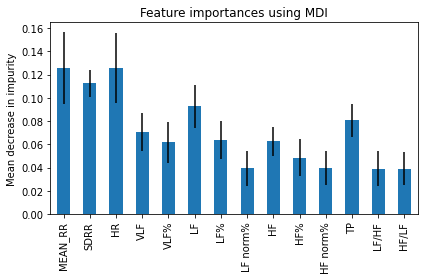

In [ ]:
#feature_names = [f"feature {i}" for i in range(X_train_new.shape[1])]
feature_names = ["MEAN_RR", "SDRR", "HR", "VLF", "VLF%", "LF", "LF%", "LF norm%", "HF", "HF%", "HF norm%", "TP", "LF/HF", "HF/LF"]
print(feature_names)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig("Figure 1.png", dpi=300, format='png')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(RFC, X_test_new, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 75.921 seconds


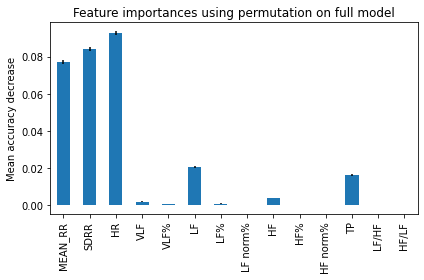

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.savefig("Figure 2.png", dpi=300, format='png')
plt.show()

In [ ]:
#Adaboost model
# Instantiate dt
DTC = DecisionTreeClassifier(max_depth=2, random_state=1)
# Instantiate ada
ADA = AdaBoostClassifier(base_estimator=DTC, n_estimators=100, random_state=1)
ADA.fit(X_train_new, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   n_estimators=100, random_state=1)

In [ ]:
y_pred_proba = ADA.predict_proba(X_test_new)

In [ ]:
#ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
#print('ROC AUC score: {:.2f}'.format(ada_roc_auc))
ADA.score(X_test_new, y_test)

0.7697706723856408

In [ ]:
ADA_y_predict = ADA.predict(X_test_new)
ADA_cf=confusion_matrix(y_test, ADA_y_predict)
print(metrics.classification_report(y_test, ADA_y_predict))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     22158
           1       0.71      0.74      0.72     11782
           2       0.74      0.73      0.74      7093

    accuracy                           0.77     41033
   macro avg       0.75      0.76      0.76     41033
weighted avg       0.77      0.77      0.77     41033



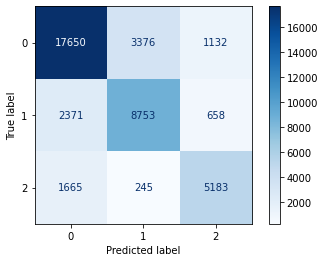

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, ADA_y_predict, display_labels=ADA.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

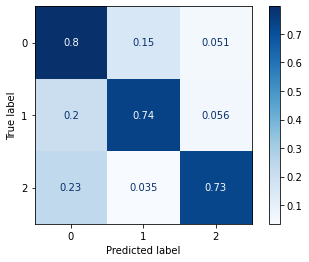

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, ADA_y_predict, display_labels=ADA.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#xgb model
XGB = XGBClassifier()

In [ ]:
#fit the model
XGB.fit(X_train_new, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
XGB.score(X_test_new, y_test)

0.8123949016645139

In [ ]:
XGB_y_predict = XGB.predict(X_test_new)
XGB_cf=confusion_matrix(y_test, XGB_y_predict)
print(metrics.classification_report(y_test, XGB_y_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     22158
           1       0.86      0.71      0.78     11782
           2       0.83      0.62      0.71      7093

    accuracy                           0.81     41033
   macro avg       0.83      0.75      0.78     41033
weighted avg       0.82      0.81      0.81     41033



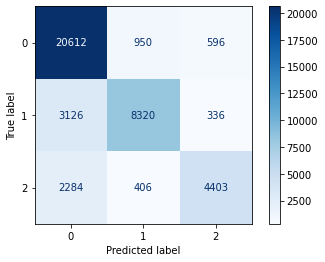

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, XGB_y_predict, display_labels=XGB.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

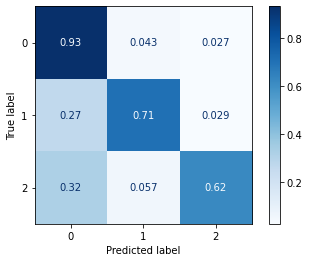

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, XGB_y_predict, display_labels=XGB.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Multi-layer NN model 20 hidden layers 300 nodes
#MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 300), 
#                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
#MLPC.fit(X_train_new, y_train)

In [ ]:
#MLPC.score(X_test_new, y_test)

In [ ]:
#MLPC_y_predict = MLPC.predict(X_test_new)
#MLPC_cf=confusion_matrix(y_test, MLPC_y_predict)
#print(metrics.classification_report(y_test, MLPC_y_predict))

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
#                                                normalize=None, cmap=plt.cm.Blues)
#plt.show()

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
#                                                normalize='true', cmap=plt.cm.Blues)
#plt.show()

In [ ]:
#Multi-layer NN model 20 hidden layers 200 nodes
#MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(10, 200), 
#                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
#MLPC.fit(X_train_new, y_train)

In [ ]:
#MLPC.score(X_test_new, y_test)

In [ ]:
#MLPC_y_predict = MLPC.predict(X_test_new)
#MLPC_cf=confusion_matrix(y_test, MLPC_y_predict)
#print(metrics.classification_report(y_test, MLPC_y_predict))
#print(MLPC_cf)

In [ ]:
#Multi-layer NN model 10 hidden layers 200 nodes
MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 200), 
                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
MLPC.fit(X_train_new, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 200), max_iter=10000,
              random_state=42)

In [ ]:
MLPC.score(X_test_new, y_test)

0.9777496161626008

In [ ]:
MLPC_y_predict = MLPC.predict(X_test_new)
MLPC_cf=confusion_matrix(y_test, MLPC_y_predict)
print(metrics.classification_report(y_test, MLPC_y_predict))
print(MLPC_cf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22158
           1       0.99      0.97      0.98     11782
           2       0.98      0.95      0.97      7093

    accuracy                           0.98     41033
   macro avg       0.98      0.97      0.98     41033
weighted avg       0.98      0.98      0.98     41033

[[21936   106   116]
 [  325 11438    19]
 [  302    45  6746]]


In [ ]:
#Multi-layer NN model 20 hidden layers 100 nodes each
MLPC_20_100 = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 100), 
                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
MLPC_20_100.fit(X_train_new, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 100), max_iter=10000,
              random_state=42)

In [ ]:
MLPC_20_100.score(X_test_new, y_test)

0.9740452806277874

In [ ]:
MLPC_20_100_y_predict = MLPC_20_100.predict(X_test_new)
MLPC_20_100_cf=confusion_matrix(y_test, MLPC_20_100_y_predict)
print(metrics.classification_report(y_test, MLPC_20_100_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22158
           1       0.97      0.97      0.97     11782
           2       0.97      0.96      0.96      7093

    accuracy                           0.97     41033
   macro avg       0.97      0.97      0.97     41033
weighted avg       0.97      0.97      0.97     41033



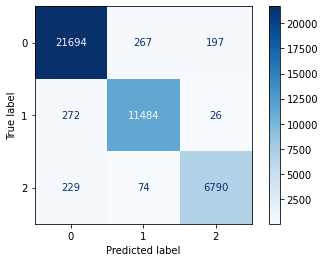

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_20_100_y_predict, display_labels=MLPC_20_100.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

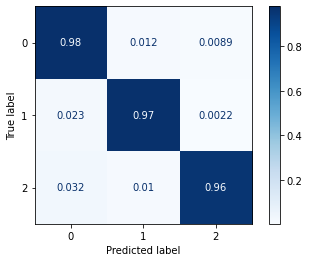

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_20_100_y_predict, display_labels=MLPC_20_100.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
# K-nn model k=10

KNC = KNeighborsClassifier(n_neighbors=7)
KNC.fit(X_train_new, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
KNC.score(X_test_new, y_test)

0.9869617137425974

In [ ]:
KNC_y_predict = KNC.predict(X_test_new)
KNC_cf=confusion_matrix(y_test, KNC_y_predict)
print(metrics.classification_report(y_test, KNC_y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22158
           1       0.99      0.99      0.99     11782
           2       0.98      0.98      0.98      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.98      0.99     41033
weighted avg       0.99      0.99      0.99     41033



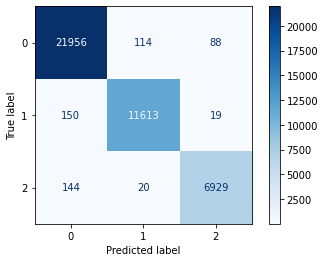

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, KNC_y_predict, display_labels=KNC.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

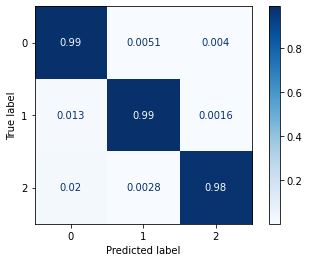

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, KNC_y_predict, display_labels=KNC.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#test sleep quality for different models

KNC_sleep_predict = KNC.predict(HRV_P1_test)
pd.DataFrame(KNC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/KNC_predict_P1.csv")
KNC_sleep_predict = KNC.predict(HRV_P2_test)
pd.DataFrame(KNC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/KNC_predict_P2.csv")
KNC_sleep_predict = KNC.predict(HRV_P3_test)
pd.DataFrame(KNC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/KNC_predict_P3.csv")

In [ ]:
MLPC_sleep_predict = MLPC.predict(HRV_P1_test)
pd.DataFrame(MLPC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/MLPC_predict_P1.csv")
MLPC_sleep_predict = MLPC.predict(HRV_P2_test)
pd.DataFrame(MLPC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/MLPC_predict_P2.csv")
MLPC_sleep_predict = MLPC.predict(HRV_P3_test)
pd.DataFrame(MLPC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/MLPC_predict_P3.csv")

In [ ]:
ADA_sleep_predict = ADA.predict(HRV_P1_test)
pd.DataFrame(ADA_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/ADA_predict_P1.csv")
ADA_sleep_predict = ADA.predict(HRV_P2_test)
pd.DataFrame(ADA_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/ADA_predict_P2.csv")
ADA_sleep_predict = ADA.predict(HRV_P2_test)
pd.DataFrame(ADA_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/ADA_predict_P3.csv")

In [ ]:
XGB_sleep_predict = XGB.predict(HRV_P1_test)
pd.DataFrame(XGB_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/XGB_predict_P1.csv")
XGB_sleep_predict = XGB.predict(HRV_P2_test)
pd.DataFrame(XGB_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/XGB_predict_P2.csv")
XGB_sleep_predict = XGB.predict(HRV_P3_test)
pd.DataFrame(XGB_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/XGB_predict_P3.csv")

In [ ]:
RFC_sleep_predict = RFC.predict(HRV_P1_test)
pd.DataFrame(RFC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/RFC_predict_P1.csv")
RFC_sleep_predict = RFC.predict(HRV_P2_test)
pd.DataFrame(RFC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/RFC_predict_P2.csv")
RFC_sleep_predict = RFC.predict(HRV_P3_test)
pd.DataFrame(RFC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/RFC_predict_P3.csv")

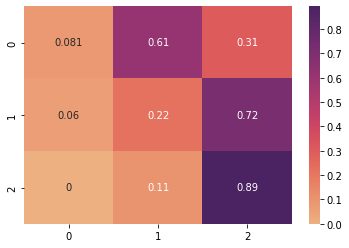

In [ ]:
# confusion matrix examples
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
cf=[[5/62, 38/62, 19/62],[12/200, 44/200, 144/200],[0/376, 40/376, 336/376]]
sn.heatmap(cf, annot=True, cmap='flare')
plt.show()

In [ ]:
# SVC self_training
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_new)
#X_test_scaled = scaler.transform(X_test_new)
#svm = SVC()
#svm.fit(X_train_scaled, y_train)

#new methods
#svc_model = SVC(kernel='rbf', 
#            probability=True, 
#            C=1.0, # default = 1.0
#            gamma='scale', # default = 'scale'
#            random_state=0
#           )
#SVCC = svc_model.fit(X_train_new, y_train)

In [ ]:
#svc_y_predict = svc_model.predict(X_test_new)
#svc_model.score(X_test_new, y_test)
#print(metrics.classification_report(y_test, svc_y_predict))

In [ ]:
#svc_cf=confusion_matrix(y_test, svc_y_predict)

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_y_predict, display_labels=svm.classes_, 
#                                                normalize=None, cmap=plt.cm.Blues)
#plt.show()

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_y_predict, display_labels=svm.classes_, 
#                                                normalize='true', cmap=plt.cm.Blues)
#plt.show()

In [ ]:
#SVC_sleep_predict = svm.predict(HRV_P1_test)
#pd.DataFrame(SVC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/SVC_predict_P1.csv")
#SVC_sleep_predict = svm.predict(HRV_P2_test)
#pd.DataFrame(SVC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/SVC_predict_P2.csv")
#SVC_sleep_predict = svm.predict(HRV_P3_test)
#pd.DataFrame(SVC_sleep_predict).to_csv("/content/drive/MyDrive/SWELL/hrv sleep/SVC_predict_P3.csv")